# Machine Learning

## Step 1: EDA

### 1D

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# No null values, data types look ok so far
df.duplicated().sum()

1171

This dataset has 30% duplication because there is no primary key feature in this dataset. I am not going to drop duplicated records.

array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:title={'center':'salary_in_usd'}>,
        <AxesSubplot:title={'center':'remote_ratio'}>]], dtype=object)

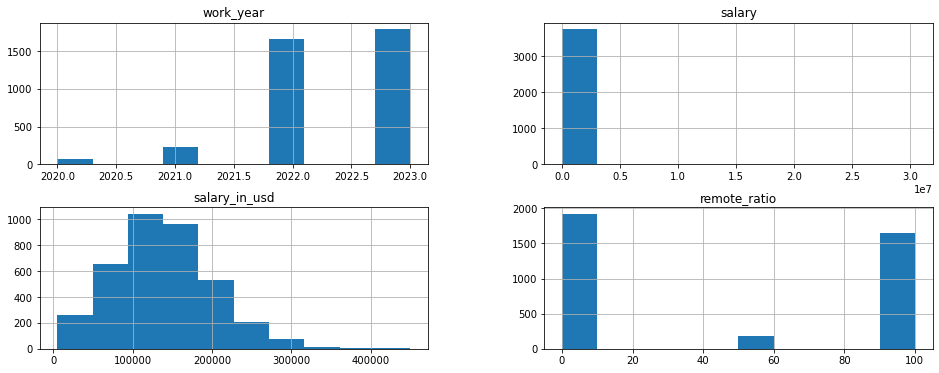

In [5]:
df.hist( figsize = (16,6))

In [6]:
df['salary'].describe()

count    3.755000e+03
mean     1.906956e+05
std      6.716765e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.380000e+05
75%      1.800000e+05
max      3.040000e+07
Name: salary, dtype: float64

In [7]:
df[df['salary'] == df['salary'].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L


In [8]:
df.drop(['salary', 'salary_currency'], axis = 1, inplace = True)

In [9]:
cl = df.groupby('company_location')['salary_in_usd'].count()

In [10]:
cl

company_location
AE       3
AL       1
AM       1
AR       3
AS       3
      ... 
TH       3
TR       5
UA       4
US    3040
VN       1
Name: salary_in_usd, Length: 72, dtype: int64

<AxesSubplot:xlabel='company_location'>

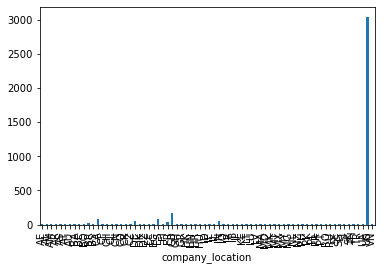

In [11]:
cl.plot(kind = 'bar')

This is an example of imbalance feature. There are few ways to tackle this problem:
1. Not dealing with it: I can choose to just examine US and CA DS job market since the two countries have similar standard of living
2. Sampling them based on the distribution
3. Make separate model for each category

I am choosing option 1 because this dataset is static

In [12]:
df_US = df[df['company_location'].isin(['US','CA'])]
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 1 to 3753
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3127 non-null   int64 
 1   experience_level    3127 non-null   object
 2   employment_type     3127 non-null   object
 3   job_title           3127 non-null   object
 4   salary_in_usd       3127 non-null   int64 
 5   employee_residence  3127 non-null   object
 6   remote_ratio        3127 non-null   int64 
 7   company_location    3127 non-null   object
 8   company_size        3127 non-null   object
dtypes: int64(3), object(6)
memory usage: 244.3+ KB


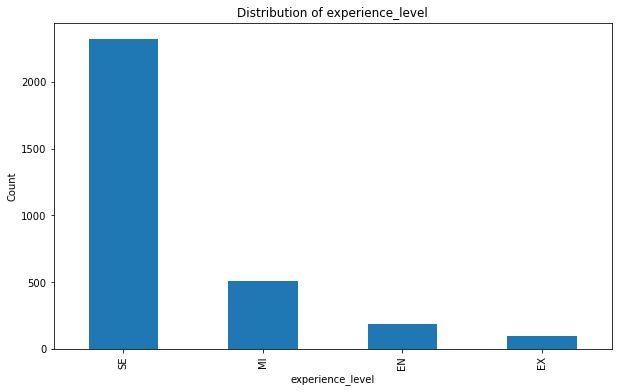

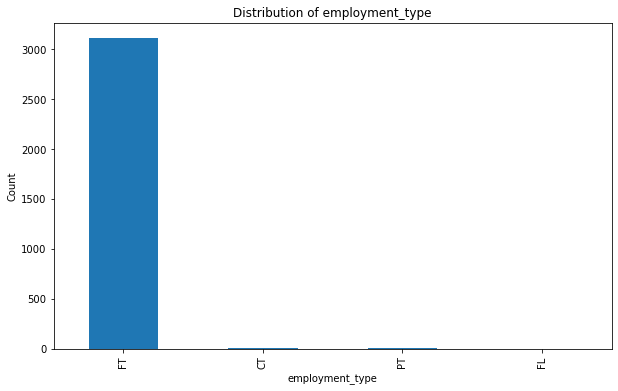

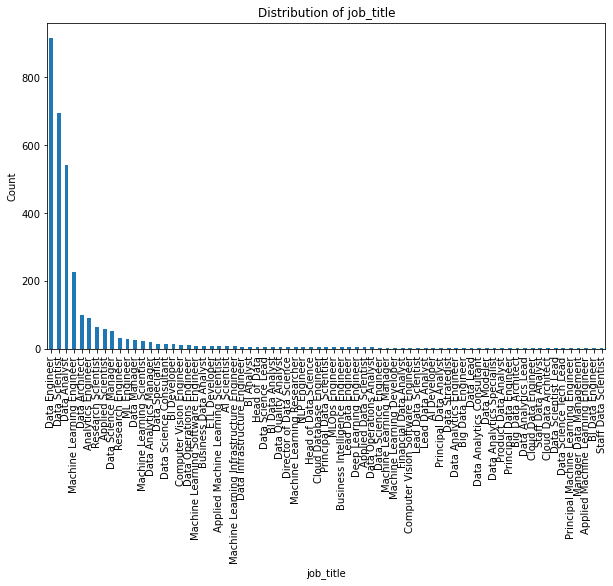

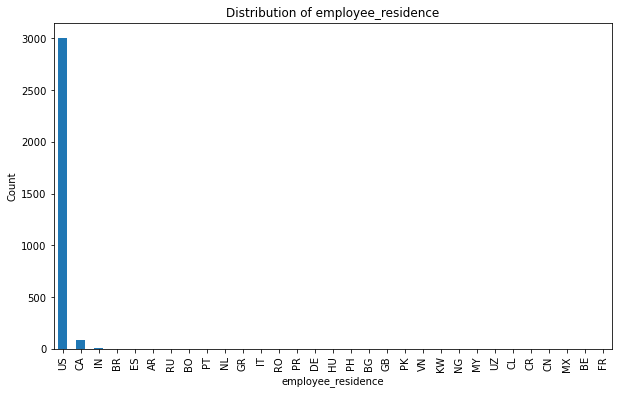

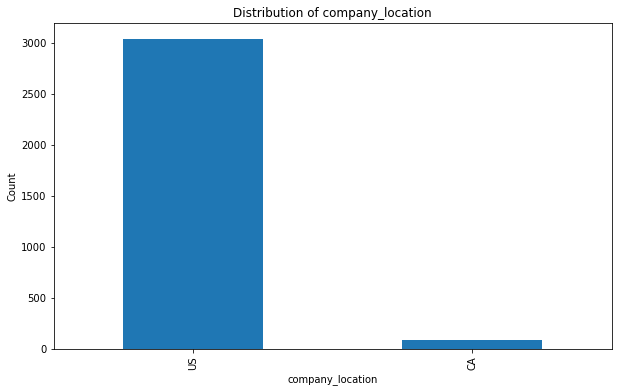

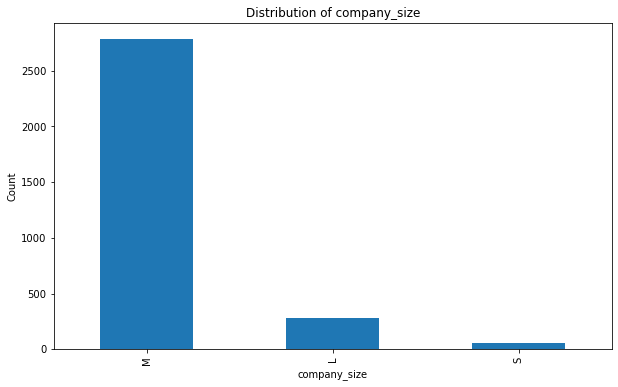

In [13]:
cat_col = list(df_US.columns[df_US.dtypes == 'object'])
num_col = list(df_US.columns[df_US.dtypes != 'object'])
for col in cat_col:
    plt.figure(figsize=(10, 6))
    df_US[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of ' + col)
    plt.show()
    

1. Same with company location, full-timers dominant the dataset. 
2. I am going to only examine FT. I will create a feature indicates whether the job and employee are in the same location, then drop both columns: 'company_location' and 'employee location'
3. Job titles have many values and I will attempt to use KNN to put these title in 4 or 5 cluster. 

In [14]:
df_US = df_US[df_US['employment_type'] == 'FT']

In [15]:
df_US['employee_at_job_location'] = (df_US['employee_residence']== df_US['company_location']).astype(int)
df_US.drop(['employee_residence','company_location','employment_type'],axis = 1,inplace=True)
df_US.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_at_job_location
3,2023,SE,Data Scientist,175000,100,M,1
4,2023,SE,Data Scientist,120000,100,M,1
5,2023,SE,Applied Scientist,222200,0,L,1
6,2023,SE,Applied Scientist,136000,0,L,1
7,2023,SE,Data Scientist,219000,0,M,1


In [20]:
cat_col = list(df_US.columns[df_US.dtypes == 'object'])
num_col = list(df_US.columns[df_US.dtypes != 'object'])

In [24]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from kmodes.kmodes import KModes

# Initialize KModes with 3 clusters
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

# Fit the model
clusters = km.fit_predict(df_US[['job_title']])

# Assign the cluster labels back to the DataFrame
df_US['job_title_cluster'] = clusters

df_US.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1274.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1402.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1431.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 964.0
Best run was number 3


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_at_job_location,Cluster,job_title_cluster
3,2023,SE,Data Scientist,175000,100,M,1,1,2
4,2023,SE,Data Scientist,120000,100,M,1,1,2
5,2023,SE,Applied Scientist,222200,0,L,1,0,0
6,2023,SE,Applied Scientist,136000,0,L,1,0,0
7,2023,SE,Data Scientist,219000,0,M,1,1,2


### 2D

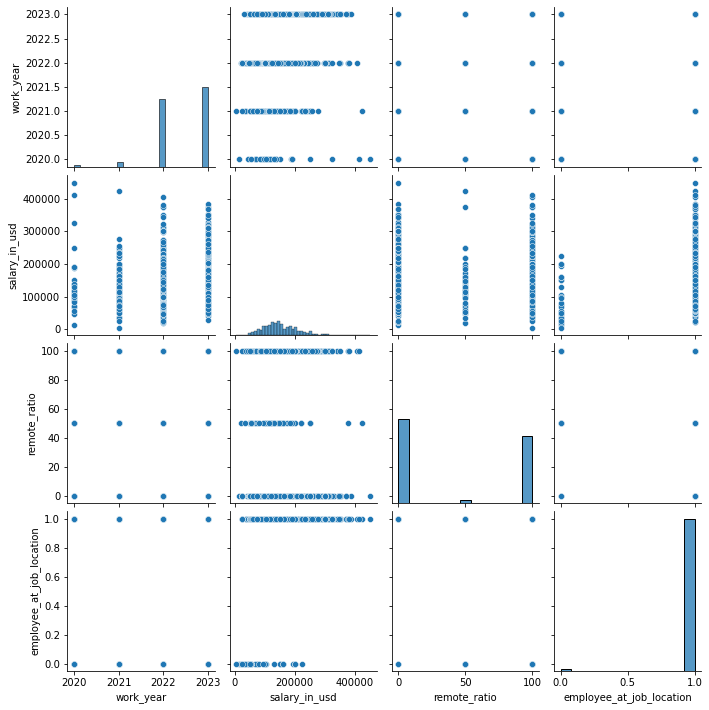

In [16]:
# Create Pair Plot 
sns.pairplot(df_US)

There is no dependent on any two features

In [21]:
for col in cat_col:
    for col1 in cat_col:
        if col == col1: 
            break
        else:
            cross_tab = pd.crosstab(df_US[col], df_US[col1], margins=True)
            print(cross_tab)


experience_level                    EN   EX   MI    SE   All
job_title                                                   
AI Developer                         0    0    1     1     2
AI Scientist                         2    1    3     0     6
Analytics Engineer                   1    8    8    75    92
Applied Data Scientist               0    0    2     2     4
Applied Machine Learning Engineer    0    0    1     0     1
...                                ...  ...  ...   ...   ...
Product Data Analyst                 1    0    1     0     2
Research Engineer                    8    0    5    18    31
Research Scientist                   6    0   14    43    63
Staff Data Analyst                   0    1    0     0     1
All                                182  101  506  2320  3109

[73 rows x 5 columns]
experience_level   EN   EX   MI    SE   All
company_size                               
L                  43    6   63   164   276
M                 124   91  431  2138  2784
S       